In [79]:
import pandas as pd
import numpy as np
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import accuracy_score
from   sklearn.preprocessing import StandardScaler
from   sklearn import svm
from   sklearn.svm import SVC
from   sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from joblib import load
import os 
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
dfs = []

base_path = "C:\\classificador-de-padroes-de-mobilidade\\dataset\\raw\\Dataset-FallWatch"
for i in range(1,6):
    folder_name_avd = f"U{i:02d}\\AVD's"
    folder_name_fall = f"U{i:02d}\\Falls"
    
    folder_path_avd = os.path.join(base_path, folder_name_avd)
    folder_path_fall = os.path.join(base_path, folder_name_fall)
    
    for j in range(1, 12):
        file_name_avd = f'U{i:02d} - D{j:02d}.csv'
        file_path_avd = os.path.join(folder_path_avd, file_name_avd)
        
        file_name_fall = f'U{i:02d} - F{j:02d}.csv'
        file_path_fall = os.path.join(folder_path_fall, file_name_fall)
        
        if os.path.exists(file_path_avd):
            dataframe = pd.read_csv(file_path_avd)
            dataframe['idUsuario'] = f'U{i:02d}'
            dataframe['idTipoMovimento'] = f'D{j:02d}'
            dfs.append(dataframe)
            
        if os.path.exists(file_path_fall):
            dataframe = pd.read_csv(file_path_fall)
            dataframe['idUsuario'] = f'U{i:02d}'
            dataframe['idTipoMovimento'] = f'F{j:02d}'
            dfs.append(dataframe)

dataframe = pd.concat(dfs, ignore_index=True)

movimentos_formatados = {"D01":"Caminhando",
"D02":"Correndo",
# "D03":"Subindo e descendo escadas", nao possui no dataset
"D04":"Sentando em uma cadeira, esperar um momento e levantar-se",
"D05":"Sentado por um momento, tentar levantar-se e cair na cadeira",
"D06":"Agachando (dobrando os joelhos), amarrar sapatos e levantar-se",
"D07":"Tropeçar enquanto caminha",
"D08":"Pular suavemente sem cair(tentando alcançar um objeto)",
"D09":"Bater na mesa com a mão",
"D10":"Batendo palmas",
"F01":"Queda para frente ao caminhar causada por escorregão",
"F02":"Queda lateral ao caminhar causada por escorregão",
"F03":"Queda para trás ao caminhar causada por escorregão",
"F04":"Queda para frente ao caminhar causada por tropeço",
"F05":"Queda para trás ao tentar sentar-se",
"F06":"Queda para frente enquanto sentado, causada por desmaio ou adormecimento",
"F07":"Queda para trás enquanto sentado, causada por desmaio ou adormecimento",
"F08":"Queda lateral enquanto sentado, causada por desmaio ou adormecimento",
}

colunas_selecionadas = ['tempo','idUsuario','acelX', 'acelY', 'acelZ' ,'idTipoMovimento']
dataframe = dataframe[colunas_selecionadas]
dataframe['MAGNITUDE_ACEL']   = np.sqrt(dataframe['acelX']**2 + dataframe['acelY']**2 + dataframe['acelZ']**2)
dataframe = dataframe[dataframe['idTipoMovimento'].isin(['D01','D02'])]
dataframe = dataframe[dataframe['idUsuario'].isin(['U01'])]
dataframe = dataframe.reset_index(drop=True)
dataframe.shape
dataframe


,tempo,idUsuario,acelX,acelY,acelZ,idTipoMovimento,MAGNITUDE_ACEL
0,0,U01,-91.0,221.0,-1835.0,D01,1850.499122
1,40,U01,-88.0,339.0,-1866.0,D01,1898.583946
2,80,U01,-26.0,263.0,-1835.0,D01,1853.933656
3,120,U01,-57.0,293.0,-1887.0,D01,1910.462509
4,160,U01,-37.0,207.0,-1911.0,D01,1922.534525
...,...,...,...,...,...,...,...
997,19840,U01,-5216.0,-260.0,1483.0,D02,5428.954319
998,19880,U01,-2313.0,1277.0,668.0,D02,2725.237971
999,19920,U01,-1064.0,-900.0,37.0,D02,1394.082135
1000,19960,U01,139.0,-349.0,96.0,D02,387.734445


In [81]:
pd.DataFrame.from_dict(Counter(dataframe['idTipoMovimento']), orient="index", columns=['idTipoMovimento']).reset_index()


,index,idTipoMovimento
0,D01,501
1,D02,501


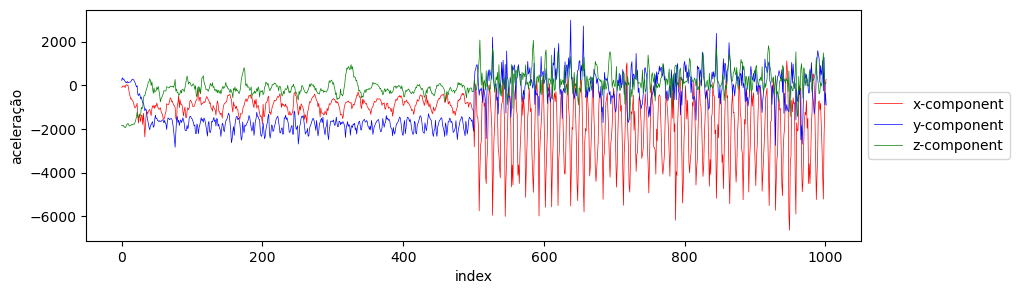

In [82]:
plt.figure(figsize=(10,3))
plt.plot(dataframe.index, dataframe['acelX'], linewidth=0.5, color='r', label='x-component')
plt.plot(dataframe.index, dataframe['acelY'], linewidth=0.5, color='b', label='y-component')
plt.plot(dataframe.index, dataframe['acelZ'], linewidth=0.5, color='g', label='z-component')
plt.xlabel('index')
plt.ylabel('aceleração')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [83]:
# columns = ['acelX', 'acelY', 'acelZ', 'MAGNITUDE_ACEL', 'idTipoMovimento']

# caminhando = dataframe[columns][dataframe.idTipoMovimento == 'D01']
# correndo = dataframe[columns][dataframe.idTipoMovimento == 'D02']

# def plot_axis(ax, x, y, title):
#     ax.plot(x, y)
#     ax.set_title(title)
#     ax.xaxis.set_visible(False)
#     ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
#     ax.set_xlim([min(x), max(x)])
#     ax.grid(True)
    
# def plot_activity(activities, titles):
#     fig, axs = plt.subplots(nrows=len(activities), figsize=(10, 8))
#     for i in range(0, len(activities)):
#         plot_axis(axs[i], activities[i].index, activities[i]['MAGNITUDE_ACEL'], titles[i])
#     plt.subplots_adjust(hspace=0.2)
#     print("")

# plot_activity([caminhando, correndo],['Caminhando', 'Correndo'])

In [84]:
dataframe['TEMPO_DIF'] = dataframe['tempo'].diff()

dataframe['FREQUENCIA'] = 1000 / dataframe['TEMPO_DIF']

frequencia_media = dataframe['FREQUENCIA'].mean()
media_tempo = dataframe['TEMPO_DIF'].mean()

print(f"Frequência média de envio de dados: {frequencia_media:.2f} Hz")
print(f"Média de tempo entre envios: {media_tempo:.2f} ms")

Frequência média de envio de dados: 24.85 Hz
Média de tempo entre envios: 19.98 ms


In [85]:
n_train = 750

# Criando listas de janelas de 10 amostras para cada eixo e magnitude
train_x_list = [dataframe.acelX.iloc[start:start+10] for start in range(n_train)]
train_y_list = [dataframe.acelY.iloc[start:start+10] for start in range(n_train)]
train_z_list = [dataframe.acelZ.iloc[start:start+10] for start in range(n_train)]
train_m_list = [dataframe.MAGNITUDE_ACEL.iloc[start:start+10] for start in range(n_train)]

# Reorganizando os sinais em uma matriz 3D (n_sinais, n_passos, n_componentes)
train_signals = np.transpose(np.array([train_x_list, train_y_list, train_z_list, train_m_list]), (1, 2, 0))

# Extraindo os rótulos diretamente do dataframe (correspondente aos registros de treino)
train_labels = np.array([dataframe.idTipoMovimento.iloc[start+9] for start in range(n_train)])

# Cálculo das dimensões dos dados
[no_signals_train, no_steps_train, no_components_train] = np.shape(train_signals)
no_labels = len(np.unique(train_labels))

print("O array de sinais de treino contém {} sinais, cada um com comprimento de {} passos e {} componentes".format(no_signals_train, no_steps_train, no_components_train))
print("O array de rótulos de treino contém {} rótulos, com a seguinte distribuição:\n {}".format(np.shape(train_labels)[0], Counter(train_labels)))


O array de sinais de treino contém 750 sinais, cada um com comprimento de 10 passos e 4 componentes
O array de rótulos de treino contém 750 rótulos, com a seguinte distribuição:
 Counter({'D01': 492, 'D02': 258})


In [86]:
def randomize(dataset, labels):
   permutation = np.random.permutation(labels.shape[0])
   shuffled_dataset = dataset[permutation, :]
   shuffled_labels = labels[permutation]
   return shuffled_dataset, shuffled_labels

train_signals, train_labels = randomize(train_signals, np.array(train_labels))

In [87]:
import numpy as np
from scipy.fftpack import fft
from scipy.signal import welch

def get_values(y_values, T, N, f_s):
    x_values = [(1/f_s) * kk for kk in range(len(y_values))]
    return x_values, y_values

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0 / N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(len(autocorr_values))])
    return x_values, autocorr_values

def find_peaks(y, mph):
    peaks = []
    for i in range(1, len(y) - 1):
        if y[i] > mph and y[i] > y[i - 1] and y[i] > y[i + 1]:
            peaks.append(i)
    return peaks

def get_first_n_peaks(x, y, no_peaks=5):
    peaks = find_peaks(y, mph=np.min(y) + (np.max(y) - np.min(y)) / 10)
    if len(peaks) >= no_peaks:
        return [x[i] for i in peaks[:no_peaks]], [y[i] for i in peaks[:no_peaks]]
    else:
        missing_no_peaks = no_peaks - len(peaks)
        return [x[i] for i in peaks] + [0] * missing_no_peaks, [y[i] for i in peaks] + [0] * missing_no_peaks

def get_features_ft(x_values, y_values, mph):
    indices_peaks = find_peaks(y_values, mph)
    peaks_x, peaks_y = get_first_n_peaks(x_values, y_values, no_peaks=len(indices_peaks))
    return peaks_x + peaks_y

def extract_features_labels(dataset, labels, T, N, f_s, denominator):
    percentile = 5
    list_of_features = []
    list_of_labels = []
    for signal_no in range(len(dataset)):
        features = []
        list_of_labels.append(labels[signal_no])
        for signal_comp in range(dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]

            signal_min = np.nanpercentile(signal, percentile)
            signal_max = np.nanpercentile(signal, 100 - percentile)
            mph = signal_min + (signal_max - signal_min) / denominator

            psd_values = get_psd_values(signal, T, N, f_s)
            fft_values = get_fft_values(signal, T, N, f_s)
            autocorr_values = get_autocorr_values(signal, T, N, f_s)

            features += get_features_ft(*psd_values, mph)
            features += get_features_ft(*fft_values, mph)
            features += get_features_ft(*autocorr_values, mph)
        list_of_features.append(features)
    
    max_length = max(len(f) for f in list_of_features)
    padded_features = [f + [0] * (max_length - len(f)) for f in list_of_features]
    return np.array(padded_features), np.array(list_of_labels)


In [91]:
N = 10  # Número de amostras por segmento
f_s = 25  # Taxa de amostragem dos dados em Hz (25Hz)
t_n = 1 / f_s * N  # Tempo total de amostragem para o segmento
T = t_n / N  # Intervalo de amostragem
denominator = 10  # Denominador para a amplitude mínima para a detecção de picos

X_train_ft, Y_train_ft = extract_features_labels(train_signals, train_labels, T, N, f_s, denominator)
print(X_train_ft.shape)
print(Y_train_ft.shape)

(750, 34)
(750,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_train_ft, Y_train_ft, train_size=0.8, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model = SVC(kernel='linear') 
# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)

# print("Support Vector Machine")
# print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
# print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
# print("Relatório de Classificação:\n",classification_report(y_test, y_pred))
# print("Matriz de Confusão:\n",confusion_matrix(y_test, y_pred))

# print("-----------------------------------")
# print("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print("Relatório de Classificação:\n",classification_report(y_test, y_pred))
# print("Matriz de Confusão:\n",confusion_matrix(y_test, y_pred))
# print("-----------------------------------")

print("Árvore de decisão")
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Relatório de Classificação:\n",classification_report(y_test, y_pred))
print("Matriz de Confusão:\n",confusion_matrix(y_test, y_pred))
print("-----------------------------------")

with open('d01_dt_model.joblib', 'wb') as file:
    dump(tree, file)

Árvore de decisão
Relatório de Classificação:
               precision    recall  f1-score   support

         D01       0.99      0.99      0.99        96
         D02       0.98      0.98      0.98        54

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Matriz de Confusão:
 [[95  1]
 [ 1 53]]
-----------------------------------
